In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
df_train = pd.read_csv('C:/Users/igor.kokarev/Downloads/train.tsv', delimiter='\t')

In [5]:
df_train.columns

Index(['train_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'price', 'shipping', 'item_description'],
      dtype='object')

In [9]:
pd.set_option('float_format', '{:f}'.format)
df_train['price'].describe()

count   1482535.000000
mean         26.737516
std          38.586066
min           0.000000
25%          10.000000
50%          17.000000
75%          29.000000
max        2009.000000
Name: price, dtype: float64

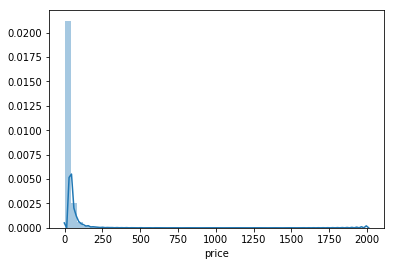

In [10]:
sns.distplot(df_train['price']);

In [11]:
print("Skewness: %f" % df_train['price'].skew())
print("Kurtosis: %f" % df_train['price'].kurt())

Skewness: 11.393232
Kurtosis: 283.821669


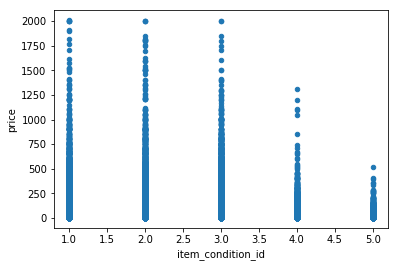

In [16]:
var = ('item_condition_id')
data = pd.concat([df_train['price'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='price');

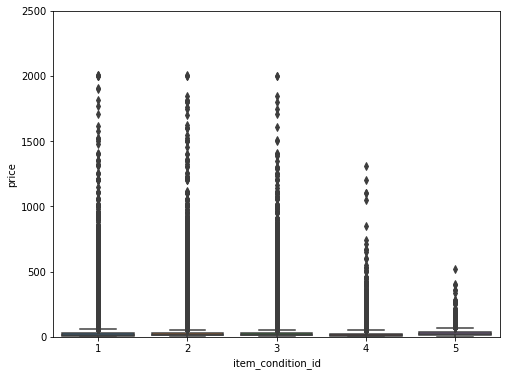

In [18]:
var = 'item_condition_id'
data = pd.concat([df_train['price'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=2500);

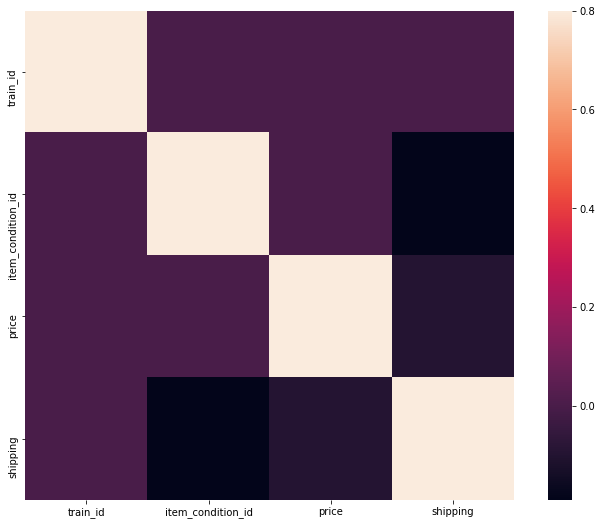

In [19]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

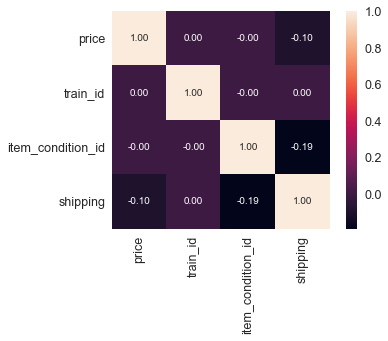

In [20]:


#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()



In [21]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
brand_name,632682,0.426757
category_name,6327,0.004268
item_description,4,0.000003
shipping,0,0.000000
price,0,0.000000
item_condition_id,0,0.000000
name,0,0.000000
train_id,0,0.000000


In [22]:
saleprice_scaled = StandardScaler().fit_transform(df_train['price'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-0.69293213]
 [-0.69293213]
 [-0.69293213]
 [-0.69293213]
 [-0.69293213]
 [-0.69293213]
 [-0.69293213]
 [-0.69293213]
 [-0.69293213]
 [-0.69293213]]

outer range (high) of the distribution:
[[ 51.11335094]
 [ 51.13926704]
 [ 51.13926704]
 [ 51.13926704]
 [ 51.13926704]
 [ 51.13926704]
 [ 51.13926704]
 [ 51.24293144]
 [ 51.29476364]
 [ 51.37251194]]


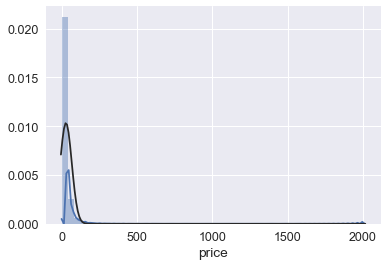

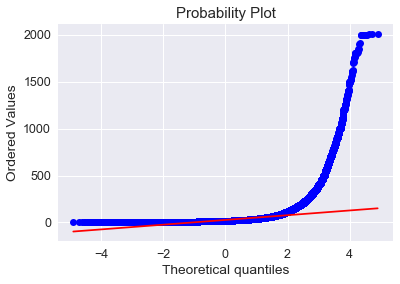

In [23]:
sns.distplot(df_train['price'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['price'], plot=plt)

In [24]:
df_train['price'] = np.log(df_train['price'])

OverflowError: cannot convert float infinity to integer

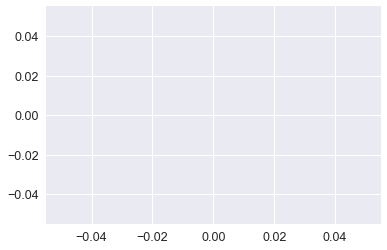

In [25]:
sns.distplot(df_train['price'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['price'], plot=plt)